In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os

In [3]:
def load_data(data_path: str) -> pd.DataFrame:
    return pd.read_csv(data_path)

In [4]:
data_path='../data/raw_data/Reviews.csv'
raw_data=load_data(data_path)
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
def explore_data(raw_data: pd.DataFrame) ->None:
    print("The General Information")
    print()
    print(f"The Size of the Dataset : {raw_data.shape}")
    print()
    #print("Information On The Datasets : ")
    print(raw_data.info())
    print("="*308)


    print("Statistical Analysis: ")
    print(raw_data.describe(include='all'))
    print()
    print("="*308)
    print("Data Types: ")
    print(raw_data.dtypes)

In [6]:
explore_data(raw_data)

The General Information

The Size of the Dataset : (568454, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
Statistical Analysis: 
                   Id   ProductId          UserId       ProfileName  \
count   568454.000000      568454     

In [7]:
def find_null(raw_data: pd.DataFrame) -> pd.DataFrame:
    check=raw_data.isnull().sum()
    print(check)

In [8]:
find_null(raw_data)

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [9]:
def check_duplicates(raw_data: pd.DataFrame)-> pd.DataFrame:
    return print(raw_data.duplicated().sum())

In [10]:
check_duplicates(raw_data)

0


In [11]:
def remove_duplicates(raw_data: pd.DataFrame ,save_path: str)->None:
    cleaned_data = raw_data.drop_duplicates(inplace=True)
    raw_data.to_csv(save_path, index=False)
    print(f"Cleaned data saved successfully at {save_path}")

In [12]:
def remove_null_values(raw_data: pd.DataFrame , save_path: str)-> None:
    cleaned_data=raw_data.dropna()
    cleaned_data.to_csv(save_path, index=False)
    print(f"Cleaned data saved to {save_path}")
    return cleaned_data

In [13]:
find_null(raw_data)

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [14]:
remove_null_values(raw_data,'../data/processed_data/processed_data.csv')

Cleaned data saved to ../data/processed_data/processed_data.csv


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [24]:
processed_data='../data/processed_data/processed_data.csv'
processed_data1=load_data(processed_data)
print(processed_data1.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [25]:
find_null(processed_data1)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [26]:
def generate_plot_count_vs_score(dataset: pd.DataFrame , save_path: str )->None:
    plt.figure(figsize=(8,6))
    sns.countplot(x='Score',data=dataset)
    plt.title('Score')
    plt.xlabel('Score')
    plt.ylabel('count')
    plt.grid()
    plt.savefig(save_path)
    plt.show()
    plt.close()

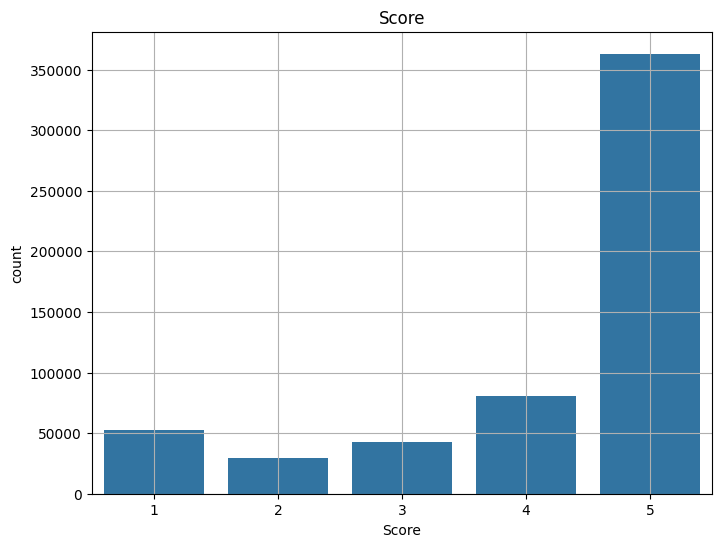

In [27]:
generate_plot_count_vs_score(processed_data1 ,'../assets/Count_vs_Score_plot.png')

In [28]:
def make_sentiment_column(dataset: pd.DataFrame, save_path: str)-> None:
    dataset["Sentiment"] = dataset["Score"].map({
        1: "Negative",
        2: "Negative",
        3: "Negative",
        4: "Positive",
        5: "Positive"
    })
    dataset.to_csv(save_path, index=False)
    print(f"Dataset with Sentiment column saved to {save_path}")
    print("Sentiment Distribution:")
    print(dataset["Sentiment"].value_counts())

In [29]:
make_sentiment_column(processed_data1,'../data/processed_data/processed_data.csv')

Dataset with Sentiment column saved to ../data/processed_data/processed_data.csv
Sentiment Distribution:
Sentiment
Positive    443756
Negative    124645
Name: count, dtype: int64


In [31]:
save_path='../data/processed_data/processed_data.csv'
processed_data2=load_data(save_path)
processed_data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [32]:
def generate_sentiment_distribution_plot(dataset: pd.DataFrame,save_path:str)->None:
    print("Pie chart: ")
    dataset["Sentiment"].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.title("Sentiment Distribution")
    plt.savefig(save_path)
    plt.show()

Pie chart: 


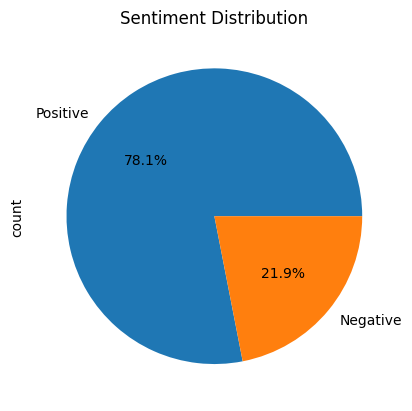

In [33]:
generate_sentiment_distribution_plot(processed_data2,'../assets/sentiment_distribution_plot.png')

In [34]:
def generate_reviews_over_time_graph(df: pd.DataFrame,save_path:str)->None:
    df["Date"] = pd.to_datetime(df["Time"], unit="s")
    df["Year"] = df["Date"].dt.year
    df["Year"].value_counts().sort_index().plot(kind="line")
    plt.title("Reviews Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Reviews")
    plt.grid()
    plt.savefig(save_path)
    plt.show()

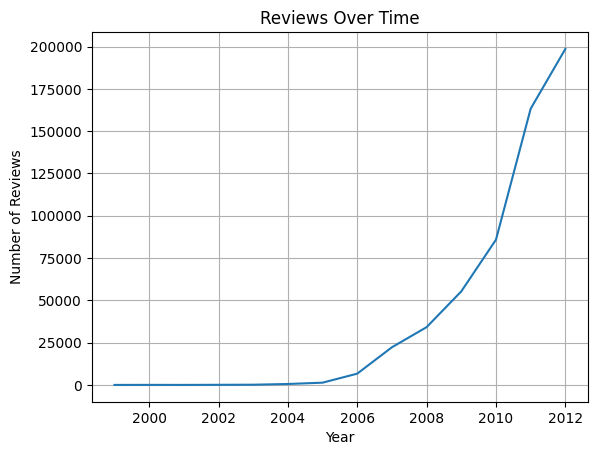

In [35]:
generate_reviews_over_time_graph(processed_data2,'../assets/Review_Over_Time_Graph.jpg')

In [36]:
def generate_top10_products_by_review_count(dataset: pd.DataFrame,save_path:str)->None:
    dataset["ProductId"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 Products by Review Count")
    plt.xlabel("Product ID")
    plt.ylabel("Number of Reviews")
    #plt.grid()
    plt.savefig(save_path)
    plt.show()

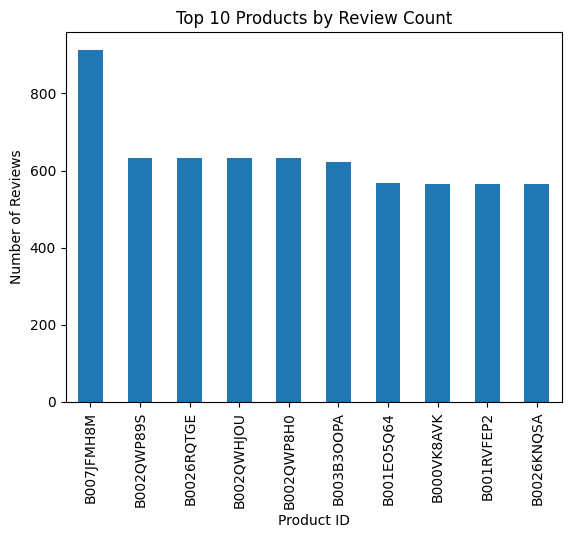

In [37]:
generate_top10_products_by_review_count(processed_data2,'../assets/Top10_Products_By_Review_Count.png')

In [38]:
def preprocess_data(dataset:pd.DataFrame ,save_path: str) -> None:
    dataset = processed_data2[['ProductId', 'UserId', 'Text']]

    dataset.to_csv(save_path, index=False)
    print(dataset.head())


In [39]:
preprocess_data3=preprocess_data(processed_data2,'../data/processed_data/processed_data.csv')

    ProductId          UserId  \
0  B001E4KFG0  A3SGXH7AUHU8GW   
1  B00813GRG4  A1D87F6ZCVE5NK   
2  B000LQOCH0   ABXLMWJIXXAIN   
3  B000UA0QIQ  A395BORC6FGVXV   
4  B006K2ZZ7K  A1UQRSCLF8GW1T   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...  


In [41]:
save_path='../data/processed_data/processed_data.csv'
data3=load_data(save_path)
print(data3.head(10))

    ProductId          UserId  \
0  B001E4KFG0  A3SGXH7AUHU8GW   
1  B00813GRG4  A1D87F6ZCVE5NK   
2  B000LQOCH0   ABXLMWJIXXAIN   
3  B000UA0QIQ  A395BORC6FGVXV   
4  B006K2ZZ7K  A1UQRSCLF8GW1T   
5  B006K2ZZ7K   ADT0SRK1MGOEU   
6  B006K2ZZ7K  A1SP2KVKFXXRU1   
7  B006K2ZZ7K  A3JRGQVEQN31IQ   
8  B000E7L2R4  A1MZYO9TZK0BBI   
9  B00171APVA  A21BT40VZCCYT4   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...  
5  I got a wild hair for taffy and ordered this f...  
6  This saltwater taffy had great flavors and was...  
7  This taffy is so good.  It is very soft and ch...  
8  Right now I'm mostly just sprouting this so my...  
9  This is a very healthy dog food. Good for thei...  
